In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# EDA

In [192]:
#Read the dataset
df = pd.read_csv('df.csv')

In [193]:
# Display basic information about the df set
print("Basic Information:")
print(df .info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226486 entries, 0 to 226485
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      226486 non-null  int64  
 1   date            226486 non-null  object 
 2   category_id     226486 non-null  int64  
 3   sku_id          226486 non-null  int64  
 4   sales_price     226486 non-null  float64
 5   sales_quantity  226486 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 10.4+ MB
None


In [194]:
# Display the first few rows of the dataset
print("\nFirst few rows:")
print(df.head())


First few rows:
   Unnamed: 0        date  category_id  sku_id  sales_price  sales_quantity
0       78161  2016-11-25            7    1108       457.60             1.0
1       81079  2016-11-18            7    2999       470.60             1.0
2       81177  2016-11-18            7    1428       717.60             1.0
3       81292  2016-11-18            7    3923       383.50             1.0
4       81416  2016-11-18           17    8075        18.85             2.0


In [195]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0        0
date              0
category_id       0
sku_id            0
sales_price       0
sales_quantity    0
dtype: int64


* Remove the Unnamed: 0 column because it is not needed.

In [196]:
#Deleting column 'Unnamed' - this data is not nessesary
df = df.drop(columns=['Unnamed: 0'])

df

,date,category_id,sku_id,sales_price,sales_quantity
0,2016-11-25,7,1108,457.60,1.0
1,2016-11-18,7,2999,470.60,1.0
2,2016-11-18,7,1428,717.60,1.0
3,2016-11-18,7,3923,383.50,1.0
4,2016-11-18,17,8075,18.85,2.0
...,...,...,...,...,...
226481,2020-10-14,7,21442,570.70,1.0
226482,2020-10-14,7,502340,505.70,3.0
226483,2020-10-14,7,723588,401.70,3.0
226484,2020-10-17,7,792124,778.70,1.0


In [197]:
df.describe()
#we don't have negative values in sales_price and sales_quantity columns

,category_id,sku_id,sales_price,sales_quantity
count,226486.000000,226486.000000,226486.000000,226486.000000
mean,15.069594,497813.898607,109.033102,16.078857
std,4.625731,242446.818578,151.500911,184.248121
min,7.000000,1045.000000,1.027000,1.000000
25%,17.000000,398064.000000,38.220000,1.000000
50%,17.000000,550996.000000,51.350000,3.000000
75%,17.000000,702116.000000,71.500000,5.000000
max,23.000000,838924.000000,2923.700000,8069.000000


In [198]:
#check if the category_id is balanced
category_id_counts = df['category_id'].value_counts()
category_id_counts

category_id
17    160797
7      51959
23     13730
Name: count, dtype: int64

* Let's convert the date column to a date format.

In [199]:
#Transforming column 'date' on datetime format
df['date'] = pd.to_datetime(df['date'])
#checking output after converting
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226486 entries, 0 to 226485
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            226486 non-null  datetime64[ns]
 1   category_id     226486 non-null  int64         
 2   sku_id          226486 non-null  int64         
 3   sales_price     226486 non-null  float64       
 4   sales_quantity  226486 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 8.6 MB


(None,
         date  category_id  sku_id  sales_price  sales_quantity
 0 2016-11-25            7    1108       457.60             1.0
 1 2016-11-18            7    2999       470.60             1.0
 2 2016-11-18            7    1428       717.60             1.0
 3 2016-11-18            7    3923       383.50             1.0
 4 2016-11-18           17    8075        18.85             2.0)

### Let's do some deeper analysis:
* Distribution of sales by day 
* Distribution of sales by category 
* Distribution of sales by product. We will use SKU
* Analysis of price median

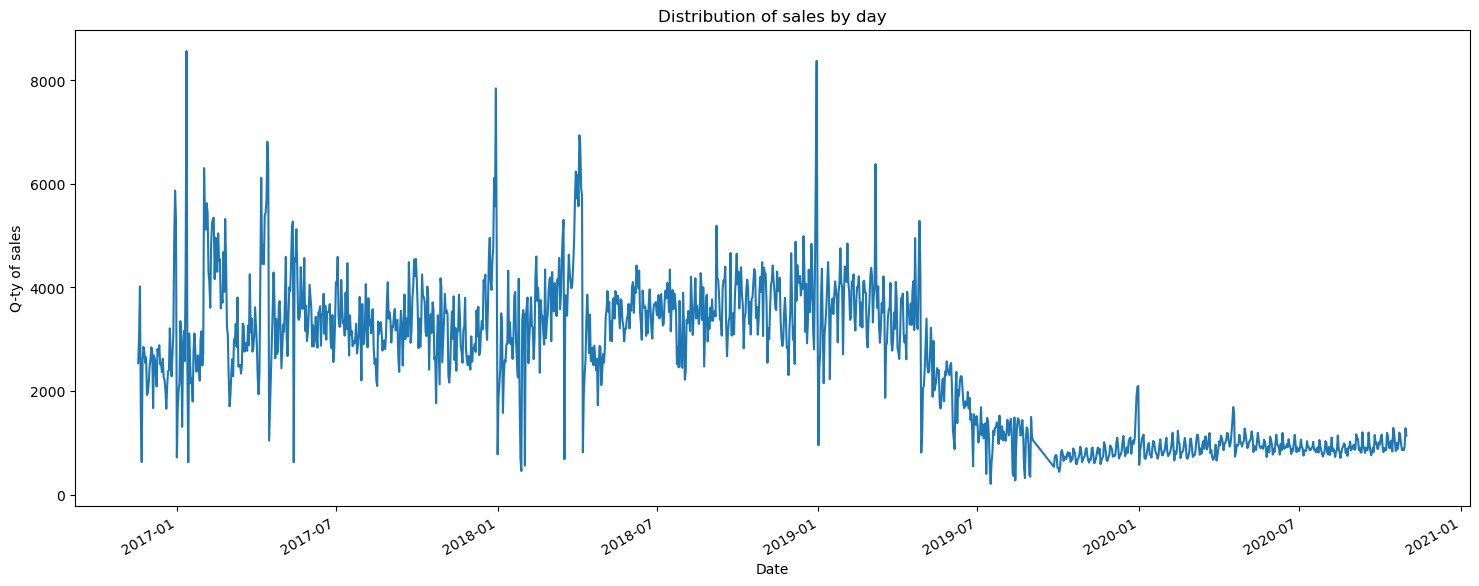

In [200]:
#Distribution of sales by day
plt.figure(figsize=(18, 7))
df.groupby('date')['sales_quantity'].sum().plot(title='Distribution of sales by day')
plt.xlabel('Date')
plt.ylabel('Q-ty of sales')
plt.show()

* Distribution of sales by day: Visualization shows that the number of sales has a significant variability, which may be due to seasonality or other factors. Also , we have a significant drop in sales_quantity

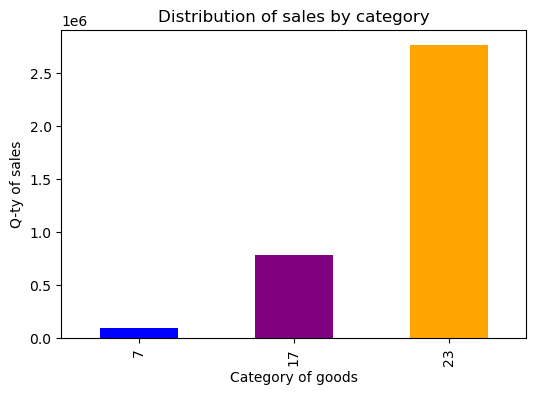

In [201]:
#Distribution of sales by category 
plt.figure(figsize=(6, 4))
colors = ['blue', 'purple', 'orange']
df.groupby('category_id')['sales_quantity'].sum().plot(kind='bar', color=colors, title='Distribution of sales by category')
plt.xlabel('Category of goods')
plt.ylabel('Q-ty of sales')
plt.show()

* Distribution of sales by category: Visualization shows that the category "23" has a significant q-ty compared to "7" and "17"

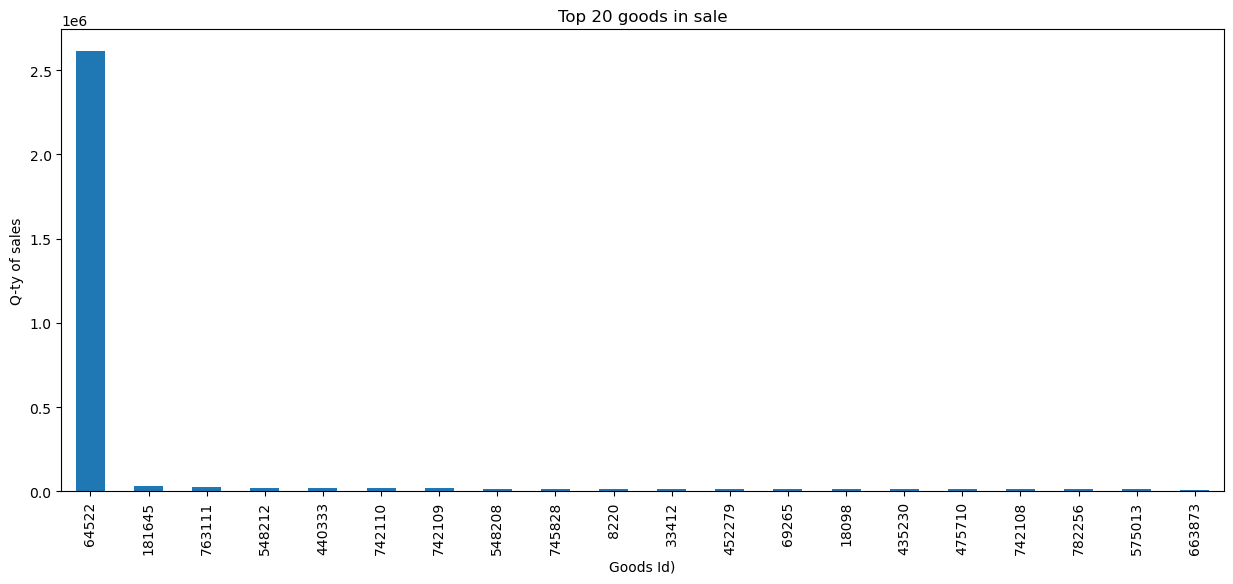

In [202]:
# Distribution of sales by product. We will use SKU.
plt.figure(figsize=(15, 6))
top_sku_sales = df.groupby('sku_id')['sales_quantity'].sum().sort_values(ascending=False).head(20)
top_sku_sales.plot(kind='bar', title='Top 20 goods in sale')
plt.xlabel('Goods Id)')
plt.ylabel('Q-ty of sales')
plt.show()

* Distribution of sales by product: SKUs_id 64522 has the highest q-ty of sales

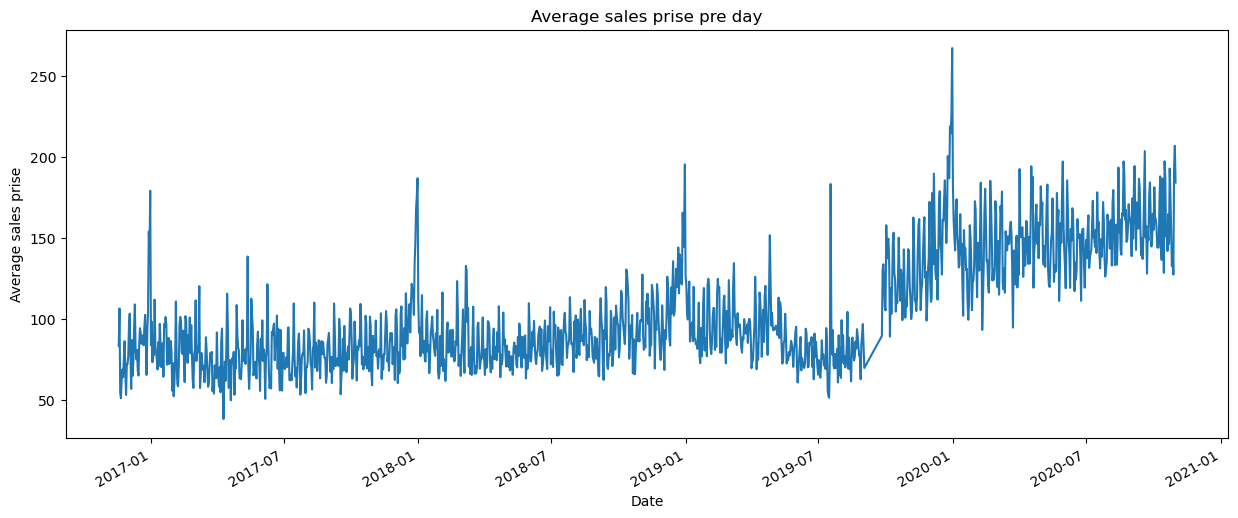

In [203]:
#Analysis of price median
plt.figure(figsize=(15, 6))
df.groupby('date')['sales_price'].mean().plot(title='Average sales prise pre day')
plt.xlabel('Date')
plt.ylabel('Average sales prise')
plt.show()

* Average sale price per day: We can notice some growing of sales from 01-2020

#### Look like after the growing in sales price from 01-2020 we have a significant sales drop in q-ty

# Feature Engineering

In [204]:
#Create day indicators for week, month, year, day and day off
df['day_of_week'] = df['date'].dt.dayofweek
#Days Indicator (0 - weekday, 1 - day off)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['week_of_year'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.year

#check
df.head()

,date,category_id,sku_id,sales_price,sales_quantity,day_of_week,is_weekend,day_of_month,month,week_of_year,year
0,2016-11-25,7,1108,457.60,1.0,4,0,25,11,47,2016
1,2016-11-18,7,2999,470.60,1.0,4,0,18,11,46,2016
2,2016-11-18,7,1428,717.60,1.0,4,0,18,11,46,2016
3,2016-11-18,7,3923,383.50,1.0,4,0,18,11,46,2016
4,2016-11-18,17,8075,18.85,2.0,4,0,18,11,46,2016


In [205]:
#Sort df by 'date'
df = df.sort_values(by='date')

#check
df.head()

,date,category_id,sku_id,sales_price,sales_quantity,day_of_week,is_weekend,day_of_month,month,week_of_year,year
2355,2016-11-18,17,415510,23.205,1.0,4,0,18,11,46,2016
2356,2016-11-18,17,420009,22.490,2.0,4,0,18,11,46,2016
8144,2016-11-18,17,567734,23.205,1.0,4,0,18,11,46,2016
8023,2016-11-18,17,556333,32.760,2.0,4,0,18,11,46,2016
7797,2016-11-18,7,566241,283.400,1.0,4,0,18,11,46,2016


# Modeling the data

In [218]:
#Encoding the data using the On-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False) #sparse=False, output data in the form of a normal dense NumPy array
encoded_features = encoder.fit_transform(df[['category_id']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['category_id']))
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df_encoded = df_encoded.drop(columns=['category_id'])

In [207]:
df_encoded.head()

,date,sku_id,sales_price,sales_quantity,day_of_week,is_weekend,day_of_month,month,week_of_year,year,category_id_7,category_id_17,category_id_23
0,2016-11-18,415510,23.205,1.0,4,0,18,11,46,2016,0.0,1.0,0.0
1,2016-11-18,420009,22.490,2.0,4,0,18,11,46,2016,0.0,1.0,0.0
2,2016-11-18,567734,23.205,1.0,4,0,18,11,46,2016,0.0,1.0,0.0
3,2016-11-18,556333,32.760,2.0,4,0,18,11,46,2016,0.0,1.0,0.0
4,2016-11-18,566241,283.400,1.0,4,0,18,11,46,2016,1.0,0.0,0.0


In [208]:
# Separate numerical features
numerical_features = df_encoded[['sales_price']]
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

In [209]:
# Combine scaled numerical features with encoded categorical features
df_encoded_scaled = pd.concat([df_encoded.reset_index(drop=True).drop(columns=['sales_price']), 
                               pd.DataFrame(numerical_features_scaled, columns=['sales_price'])], axis=1)

In [210]:
# Features and target variable
X = df_encoded_scaled.drop(columns=['sales_quantity', 'date', 'sku_id'])
y = df_encoded['sales_quantity']

In [224]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encoding the data using One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['category_id']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['category_id']))
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df_encoded = df_encoded.drop(columns=['category_id'])

# Separate numerical features
numerical_features = df_encoded[['sales_price']]
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Combine scaled numerical features with encoded categorical features
df_encoded_scaled = pd.concat([df_encoded.reset_index(drop=True).drop(columns=['sales_price']), 
                               pd.DataFrame(numerical_features_scaled, columns=['sales_price'])], axis=1)

# Features and target variable
X = df_encoded_scaled.drop(columns=['sales_quantity', 'date', 'sku_id'])
y = df_encoded['sales_quantity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create DataFrame for Random Forest predictions
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Create Plotly figure for Random Forest
fig_rf = px.scatter(df_rf, x='Actual', y='Predicted', title='Random Forest: Actual vs Predicted')
fig_rf.add_shape(type='line', x0=df_rf['Actual'].min(), y0=df_rf['Actual'].min(), x1=df_rf['Actual'].max(), y1=df_rf['Actual'].max(), line=dict(dash='dash'))

# Display the figure
fig_rf.show()

# Generate predictions for the next 14 days for each category
category_ids = df['category_id'].unique()
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=14)
future_predictions = {}

for category_id in category_ids:
    future_data = pd.DataFrame({'date': future_dates})
    
    # Add time-based features
    future_data['day_of_week'] = future_data['date'].dt.dayofweek
    future_data['is_weekend'] = future_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    future_data['day_of_month'] = future_data['date'].dt.day
    future_data['month'] = future_data['date'].dt.month
    future_data['week_of_year'] = future_data['date'].dt.isocalendar().week
    future_data['year'] = future_data['date'].dt.year
    
    # Encode the category_id
    future_data_encoded = encoder.transform(np.ones((14, 1)) * category_id)
    future_data_encoded_df = pd.DataFrame(future_data_encoded, columns=encoder.get_feature_names_out(['category_id']))
    
    # Combine features
    future_data = pd.concat([future_data.reset_index(drop=True), future_data_encoded_df.reset_index(drop=True)], axis=1)
    
    # Scale numerical features
    future_data['sales_price'] = scaler.transform(np.ones((14, 1)) * df['sales_price'].mean())
    
    # Drop unnecessary columns
    future_data = future_data.drop(columns=['date'])
    
    # Predict future sales
    future_sales_predictions = rf_model.predict(future_data)
    future_predictions[category_id] = future_sales_predictions

future_predictions




c:\Users\uazhyhalbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



c:\Users\uazhyhalbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

c:\Users\uazhyhalbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\uazhyhalbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

c:\Users\uazhyhalbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\uazhyhalbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

c:\Users\uazhyhalbo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: 

{17: array([1.65      , 1.6       , 1.43333333, 1.39083333, 1.47083333,
        1.52833333, 1.35      , 1.33633333, 1.47      , 1.42433333,
        1.26      , 1.28833333, 1.36166667, 1.22166667]),
 7: array([2.00166667, 2.04      , 1.93      , 2.14      , 1.8875    ,
        1.8055    , 1.792     , 1.83666667, 2.12      , 1.85      ,
        2.15      , 2.09333333, 2.16433333, 2.11666667]),
 23: array([ 9.03,  8.88,  6.79,  6.44,  4.64,  5.52,  9.77, 11.41,  5.87,
         5.33,  4.34,  4.35,  6.1 ,  8.6 ])}

In [222]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming future_predictions_mean is your prediction dictionary
# Assuming you have actual sales data for the future dates in a similar format

# Example of future_predictions_mean (replace this with your actual predictions)
future_predictions_mean = {
    17: np.array([1.65, 1.6, 1.43333333, 1.39083333, 1.47083333, 1.52833333, 1.35, 1.33633333, 1.47, 1.42433333, 1.26, 1.28833333, 1.36166667, 1.22166667]),
    7: np.array([2.00166667, 2.04, 1.93, 2.14, 1.8875, 1.8055, 1.792, 1.83666667, 2.12, 1.85, 2.15, 2.09333333, 2.16433333, 2.11666667]),
    23: np.array([9.03, 8.88, 6.79, 6.44, 4.64, 5.52, 9.77, 11.41, 5.87, 5.33, 4.34, 4.35, 6.1, 8.6])
}

# Example of actual future sales data (replace this with your actual data)
# This should be a similar dictionary with actual sales values for the same categories and dates
actual_sales = {
    17: np.array([1.7, 1.5, 1.4, 1.35, 1.48, 1.55, 1.37, 1.33, 1.48, 1.42, 1.25, 1.29, 1.36, 1.23]),
    7: np.array([2.0, 2.05, 1.92, 2.15, 1.89, 1.81, 1.8, 1.84, 2.1, 1.87, 2.14, 2.09, 2.17, 2.12]),
    23: np.array([9.0, 8.85, 6.8, 6.5, 4.65, 5.55, 9.75, 11.4, 5.85, 5.35, 4.3, 4.4, 6.15, 8.65])
}

# Evaluate the model for each category
evaluation_results = {}

for category_id in future_predictions_mean.keys():
    y_true = actual_sales[category_id]
    y_pred = future_predictions_mean[category_id]
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    evaluation_results[category_id] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Display the evaluation results
for category_id, metrics in evaluation_results.items():
    print(f"Category ID: {category_id}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")
    print(f"R-squared (R2): {metrics['R2']}")
    print("\n")

#Replace the actual_sales dictionary with your actual sales data for the same future dates. This code will calculate and print the evaluation metrics for each category, 
# allowing you to assess the performance of your model.

Category ID: 17
Mean Absolute Error (MAE): 0.022666666428571434
Mean Squared Error (MSE): 0.00118327378142858
Root Mean Squared Error (RMSE): 0.03439874680026265
R-squared (R2): 0.9204467254965178


Category ID: 7
Mean Absolute Error (MAE): 0.008023809285714287
Mean Squared Error (MSE): 9.705158603174951e-05
Root Mean Squared Error (RMSE): 0.009851476337673939
R-squared (R2): 0.9944067420793841


Category ID: 23
Mean Absolute Error (MAE): 0.030714285714285885
Mean Squared Error (MSE): 0.0012071428571428717
Root Mean Squared Error (RMSE): 0.03474396144861538
R-squared (R2): 0.9997349197813032


